In [1]:
import os
import json
from collections import namedtuple

import torch
from torch.utils.data import DataLoader

baseDir = '/home/hoehlein/PycharmProjects/grib_windfields'
os.chdir(baseDir)

from GUI.GraphCreator import createVectorGraph
from DataPreprocessing.DataScaler import DataScaler
from DataPreprocessing import DataLoader as dl
from Networks.CondVAE import *

In [2]:
netName = 'CE_VGG+CD_UNet'
runNumber = 9
epoch = 200

runName = 'run_{:05d}'.format(runNumber)

encName, decName = netName.split('+')

runDir = '{}/results/{}/records/{}'.format(baseDir, netName, runName)

with open(os.path.join(runDir, 'config.json'), 'r') as f:
    configOptions = json.load(f)
    
configOptions['training'].update({'batchSize': 10})

logDir = configOptions['debugging']['recordDir']
directories = {'results': os.path.join(logDir, netName),
               'records': os.path.join(logDir, netName, 'records'),
               'models':  os.path.join(logDir, netName, 'records', 'models'),
               'data': {'training': configOptions['preprocess']['pathTraining'],
                        'test':     configOptions['preprocess']['pathTest'],
                        'raw':      configOptions['preprocess']['pathRaw']}
              }
directories.update({'currentRun': os.path.join(directories['records'], runName)})
directories.update({'models': os.path.join(directories['currentRun'], 'models')})
    
dataOpt = dl.dataSettings('input', 'input_orography', configOptions['data']['gridsInput'],
                          'target', 'target_orography', configOptions['data']['gridsTarget'])

valiOpt = dl.validationSettings(configOptions['data']['validationMode'],
                                configOptions['data']['validationInput'],
                                configOptions['data']['validationRegions'])

patchMode = configOptions['preprocess']['patchSize'] if configOptions['preprocess']['patching'] else None
trainingOpt = dl.trainingSettings(configOptions['preprocess']['monthsTraining'],
                                  patchMode, configOptions['data']['useHROrography'],
                                  configOptions['preprocess']['trainingRegions'])

# set up scaling for variable transformation
scalerUV = DataScaler(mode='normalize_neg')
scalerLSM = DataScaler(mode='normalize_neg')
scalerBLH = DataScaler(mode='normalize_neg')
scalerFSR = DataScaler(mode='normalize_neg')
scalerZ = DataScaler(mode='normalize_neg')
scalerZOro = DataScaler(mode='normalize_neg')
scalerLSMOro = DataScaler(mode='normalize_neg')
# quantizerUV = Quantizer(num_bins=100)

print(os.getcwd())

scaleDict = torch.load(os.path.join(directories['models'], 'scaling.pth'))
scaleOpt = dl.scalingSettings(*[scaleDict[key] for key in scaleDict.keys()])


dataLoader = dl.DataLoader(directories['data']['training'],
                           configOptions['data']['maxNumFiles'],
                           dataOpt, trainingOpt, scaleOpt, valiOpt)
dataTraining, dataValidation = dataLoader.loadDataForTraining()

# create loaders for PyTorch with pre-defined batch size
trainLoader = DataLoader(dataTraining, batch_size=configOptions['training']['batchSize'],
                         shuffle=True, drop_last=True, num_workers=0)
validationLoader = DataLoader(dataValidation, batch_size=configOptions['training']['batchSize'],
                              shuffle=False, drop_last=True, num_workers=0)

net = torch.load(os.path.join(directories['models'], 'CondVAE_epoch_{}.pth'.format(epoch)))['model']

/home/hoehlein/PycharmProjects/grib_windfields
[INFO]: Process data file <data/training/alps/ERA5_predictand_vars_area1_2017_packed_padded.npz>
[INFO]: Load used grids into RAM
Progress: |=========>....................| 34% (3000/8767)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |============================>.| 98% (8616/8767)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |=========>....................| 34% (3007/8760)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |==============================| 100% (8760/8760)
[INFO]: Process data file <data/training/alps/HRES_100m_wind_cpts_area1_2017_packed_padded.npz>
[INFO]: Load used grids into RAM
Progress: |=========>....................| 34% (3000/8767)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |==============================| 100% (8767/8767)
[INFO]: Process data file <data/training/alps/HRES_100m_wind_cpts_area1_2018_packed_padded.npz>
[INFO]: Load used grids into RAM
Progress: |=========>....................| 34% (3000/8760)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |==============================| 100% (8760/8760)
46.99156641960144
[INFO]: Normalize input and output channels
[INFO]: Create training and validation data
[INFO]: Number of training files: 8760
[INFO]: Number of validation files: 8760


/home/hoehlein/anaconda3/envs/pytorch_networks/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'Networks.CondVAE.Decoders.CD_UNet.CD_UNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/hoehlein/anaconda3/envs/pytorch_networks/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'Networks.CondVAE.Decoders.CD_UNet.ProbUNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [48]:
trainData = next(iter(trainLoader))
inputs_cpu, targets_cpu, gridLR, gridHR, maskLR, maskHR, hrOro, idx = trainData
cudaAvailable = torch.cuda.is_available()
device = torch.device("cuda:0" if cudaAvailable else "cpu")
net.to(device)
conditions = inputs_cpu.to(device)
target = targets_cpu.to(device)
net.eval()

CondVAE(
  (encoder): CE_VGG(
    (inputLR): Sequential(
      (0): Sequential(
        (0): ReflectionPad2d((2, 2, 2, 2))
        (1): Conv2d(6, 64, kernel_size=(5, 5), stride=(1, 1))
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): LeakyReLU(negative_slope=0.05, inplace=True)
        (4): Dropout2d(p=0.1, inplace=False)
      )
      (1): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): LeakyReLU(negative_slope=0.05, inplace=True)
      )
    )
    (inputHR): Sequential(
      (0): Sequential(
        (0): ReflectionPad2d((2, 2, 2, 2))
        (1): Conv2d(2, 64, kernel_size=(5, 5), stride=(2, 3))
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): LeakyReLU(negative_slope=0.05, inplace=True)
        (4)

In [9]:
rec_mu.element_size() * rec_mu.nelement()

6220800

In [42]:
def sample_bugfix(net, conditions, samples=1):
    sz = conditions.size()
    z = torch.randn(sz[0], samples, net.latent_channels, 3, 5, device=conditions.device)
    features = net.inputLR(conditions)
#     features = net.probUNet(z, features)
    features = net.probUNet.compression(features)
    print(len(features))
    sz = z.size()
    if sz[1] > 1:
            if net.probUNet.compression.use_cc:
                for i in range(len(features)):
                    features[i] = features[i].repeat_interleave(sz[1], dim=0)
            else:
                features = features.repeat_interleave(sz[1], dim=0)
    z = z.view(sz[0] * sz[1], *sz[2:])
    features = net.probUNet.expansion(z, features)
    features = net.probUNet.output(features)
    features = net.upres(features)
    rec_mu = net.output_mu(features)
    rec_logVar = net.output_logVar(features)
    sz_rec = rec_mu.size()
    sz_out = (sz[0], samples) + sz_rec[1:]
    return rec_mu.view(*sz_out), rec_logVar.view(*sz_out), z

In [49]:
with torch.no_grad():
    rec_mu, rec_logVar, z = sample_bugfix(net.decoder, conditions, samples=3)
    rec_mu = rec_mu.cpu().data.numpy()
    rec_logVar = rec_logVar.cpu().data.numpy()

4


In [81]:
results = []
for i in range(200):
    with torch.no_grad():
        rec, mu, logVar, z = net(target, conditions)
        rec_mu, rec_logVar = rec
        rec_mu = rec_mu.cpu().data.numpy()
        rec_logVar = rec_logVar.cpu().data.numpy()
        results += [rec_mu[0]]
        mu = mu.cpu().data.numpy()
        logVar = logVar.cpu().data.numpy()
        z = z.cpu().data.numpy()
results = np.array(results)

In [57]:
import matplotlib.pyplot as plt
import numpy as np

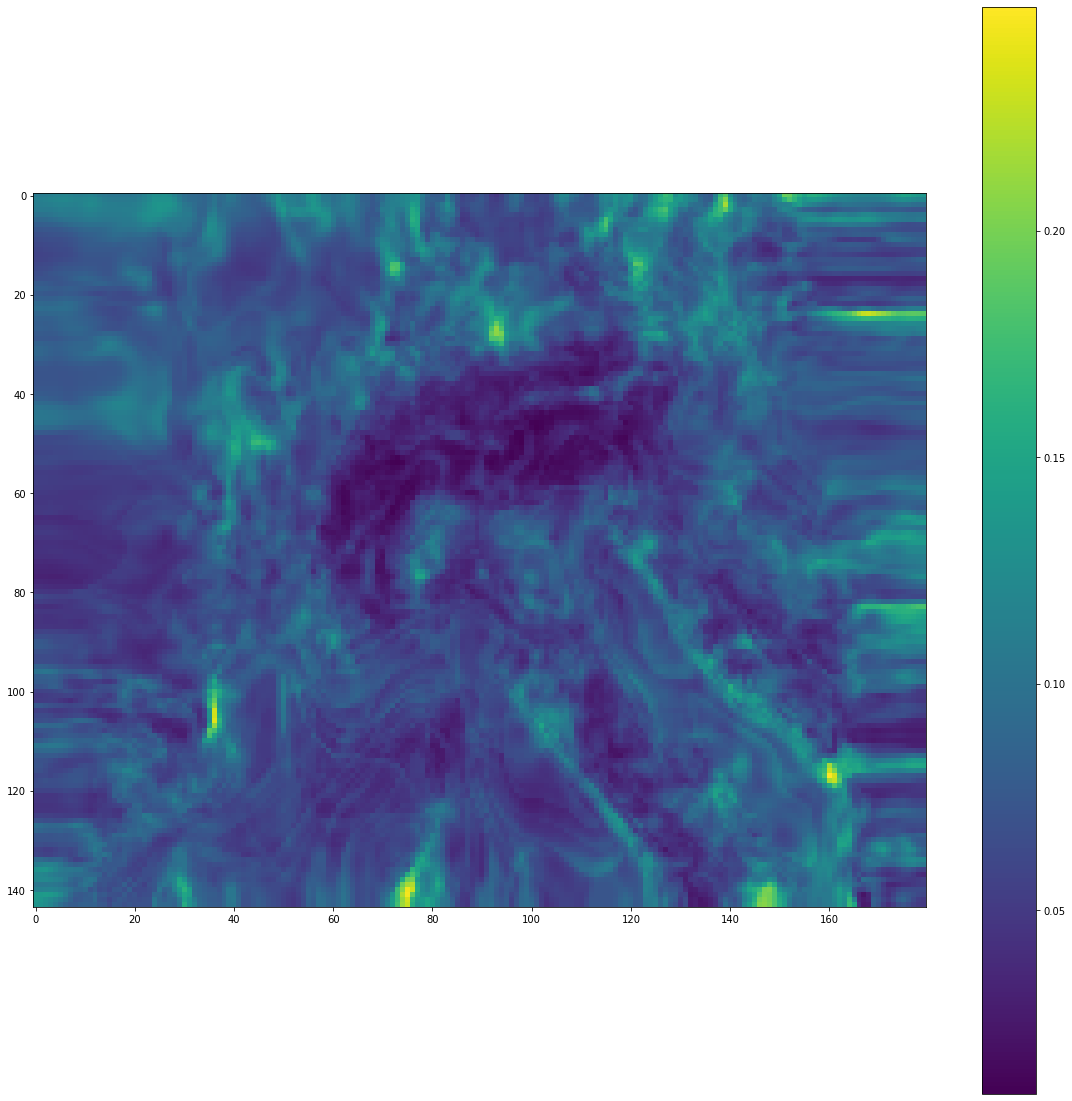

In [82]:
vars = np.sum(np.var(results, axis=0, keepdims=False), axis=0)
plt.figure(figsize=(20,20))
plt.imshow(np.sqrt(vars))
plt.colorbar()

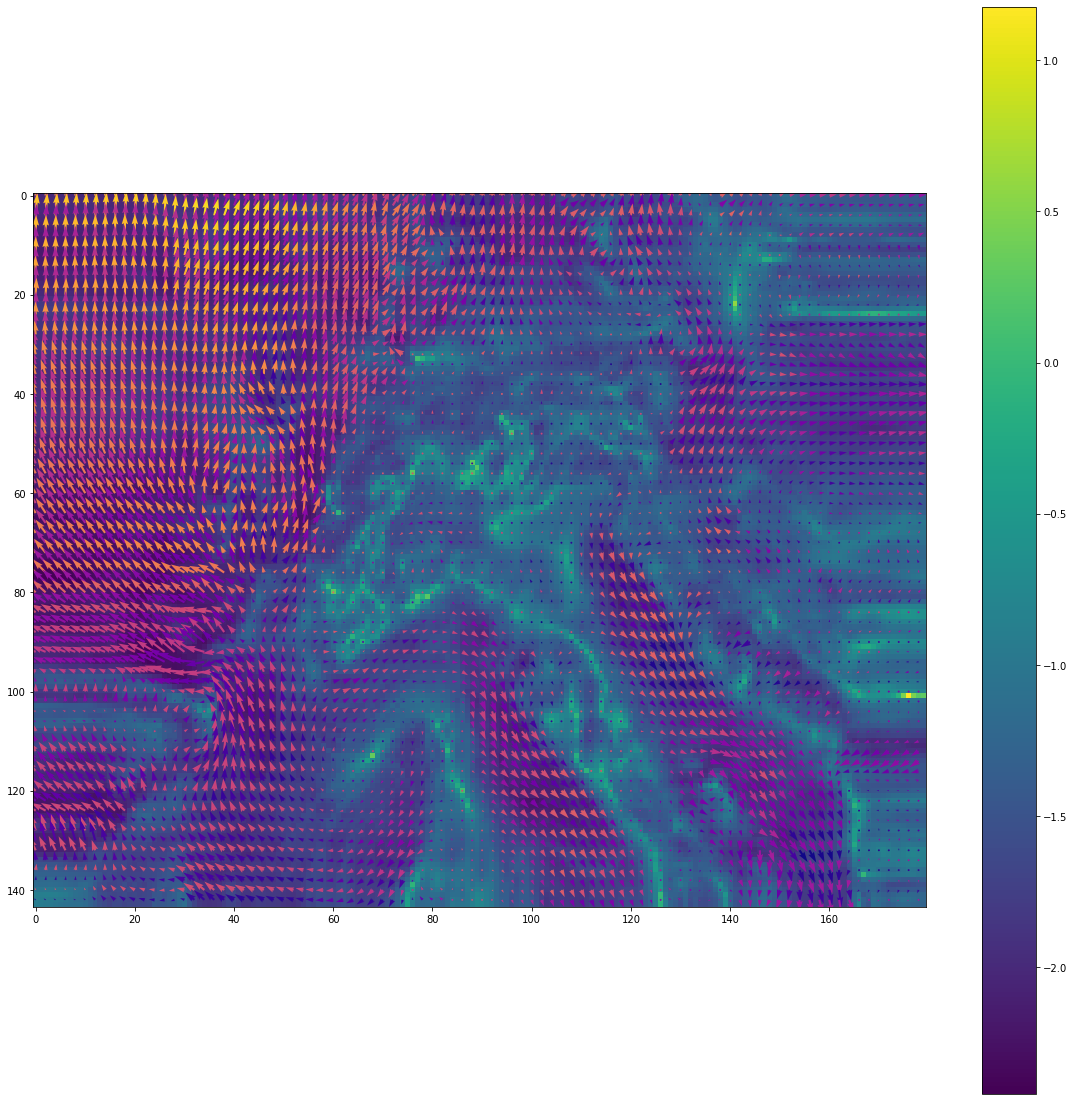

In [104]:
targets_np = targets_cpu.data.numpy()
fig = plt.sublots(4, 4,figsize=(20,20))
u = rec_mu[0,0]
v = rec_mu[0,1]
x, y = np.meshgrid(np.arange(0, 180, 2), np.arange(0, 144, 2))
# u = targets_np[0,0]
# v = targets_np[0,1]
r = np.sqrt(np.square(u)+ np.square(v))
u = u[0:-1:2,0:-1:2]
v = v[0:-1:2,0:-1:2]
plt.imshow(np.log10(vars)/2-np.log10(r))
plt.colorbar()
plt.quiver(x, y, u, v, r, scale=400, cmap='plasma')

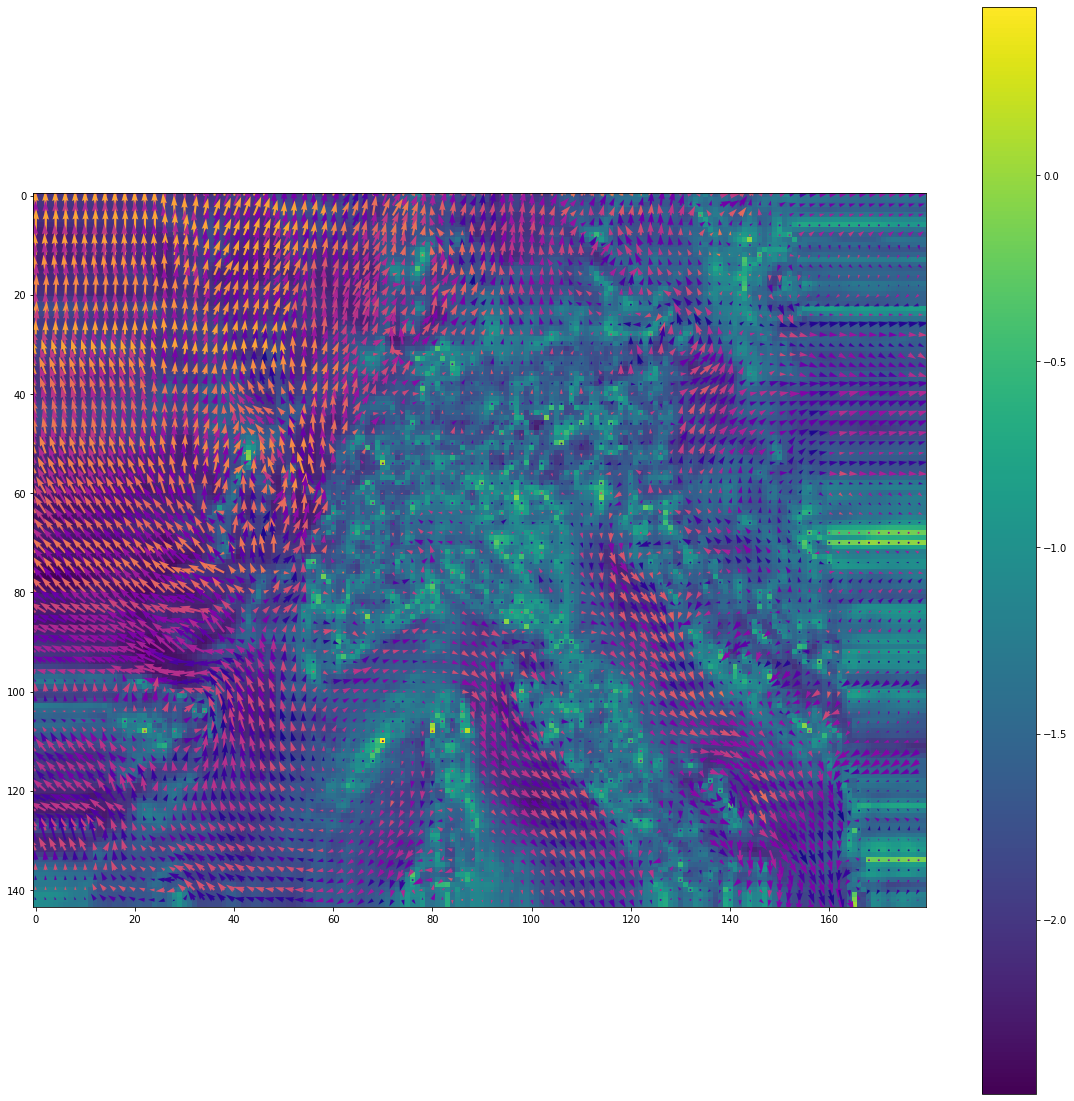

In [100]:
targets_np = targets_cpu.data.numpy()
fig = plt.figure(figsize=(20,20))
# u = rec_mu[0,0]
# v = rec_mu[0,1]
x, y = np.meshgrid(np.arange(0, 180, 2), np.arange(0, 144, 2))
u = targets_np[0,0]
v = targets_np[0,1]
r = np.sqrt(np.square(u)+ np.square(v))
u = u[0:-1:2,0:-1:2]
v = v[0:-1:2,0:-1:2]
plt.imshow(np.log10(vars)/2-np.log10(r))
plt.colorbar()
plt.quiver(x, y, u, v, r, scale=400, cmap='plasma')